In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
customers=pd.read_csv("Ecommerce Customers")

In [5]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


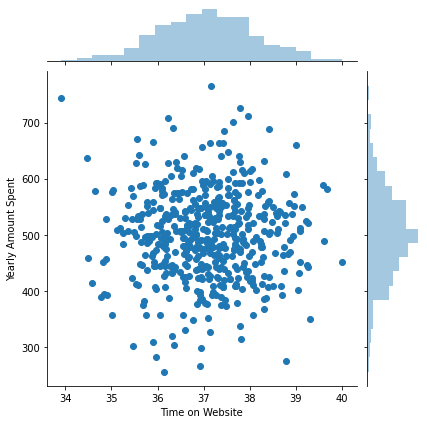

In [17]:
sns.jointplot(x="Time on Website",y="Yearly Amount Spent",data=customers)

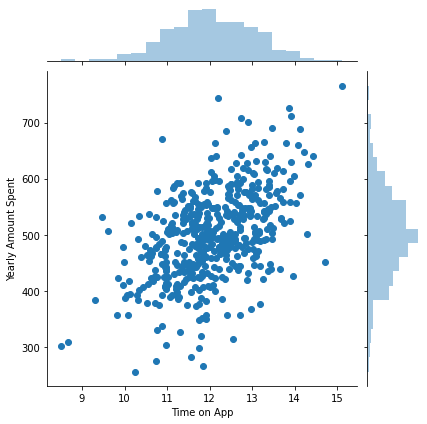

In [18]:
sns.jointplot(x="Time on App",y="Yearly Amount Spent",data=customers)

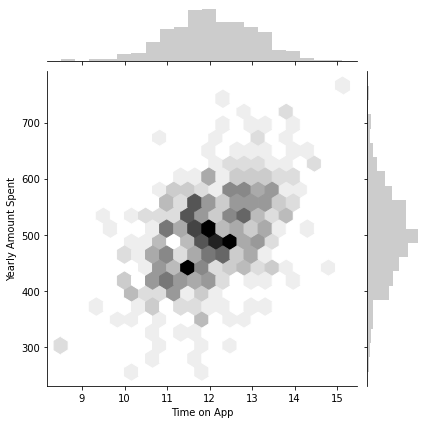

In [20]:
sns.jointplot(x="Time on App",y="Yearly Amount Spent",data=customers,kind="hex",color="gray")

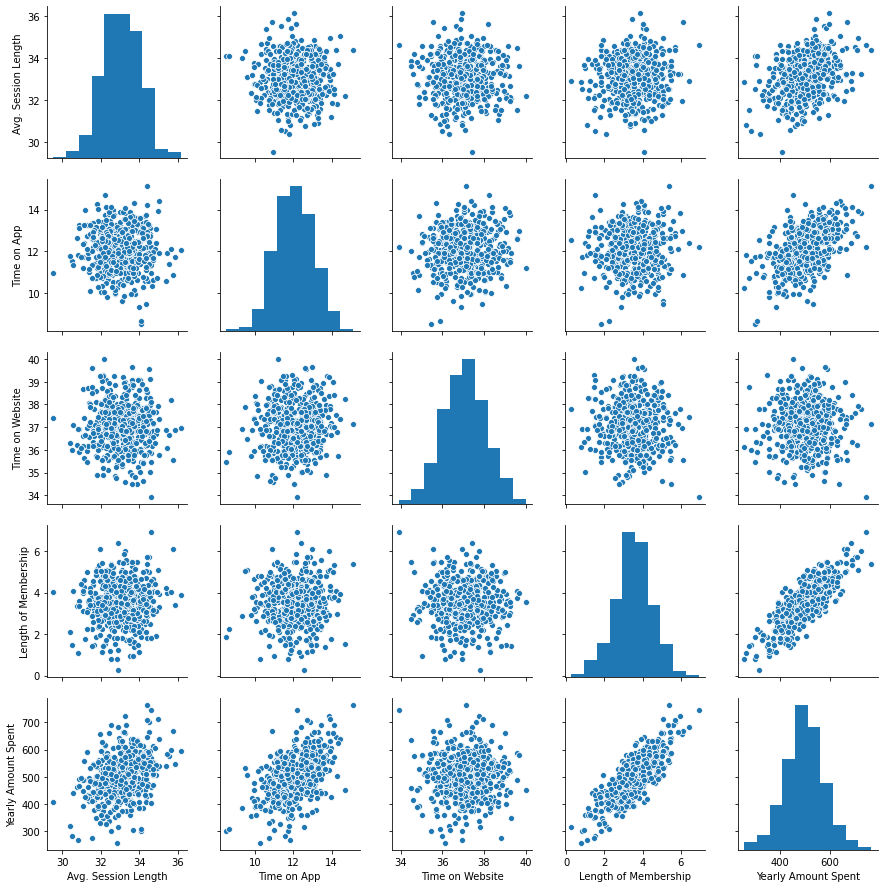

In [21]:
sns.pairplot(customers)

In [23]:
customers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


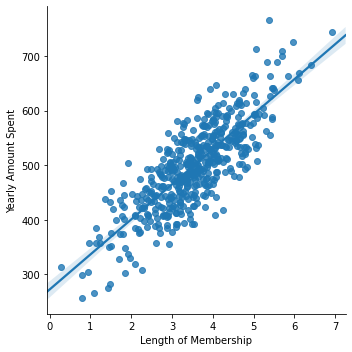

In [26]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In [29]:
x=customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=customers["Yearly Amount Spent"]

In [30]:
x.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [33]:
from sklearn.linear_model import LinearRegression

In [39]:
lm=LinearRegression()

In [40]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lm.coef_

array([25.83033417, 38.72517578,  0.95187184, 61.64324975])

In [43]:
yp=lm.predict(x_test)

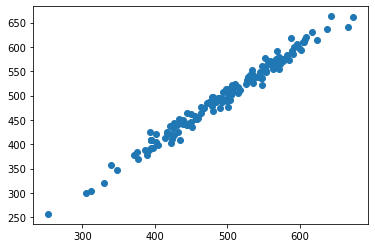

In [44]:
plt.scatter(x=yp,y=y_test)

In [49]:
from sklearn import metrics
from math import sqrt
print('MAE:',metrics.mean_absolute_error(y_test,yp), ' ',
      (1./len(y_test))*(sum(abs(y_test-yp))))
print('MSE:', 
      metrics.mean_squared_error(y_test,yp), ' ',
      (1./len(y_test))*(sum((y_test-yp)**2)))
print('RMSE:', 
      np.sqrt(metrics.mean_squared_error(y_test,yp)), ' ',
      sqrt((1./len(y_test))*(sum((y_test-yp)**2))))

MAE: 8.962008298232835   8.962008298232835
MSE: 124.25114928639829   124.25114928639827
RMSE: 11.146799957225316   11.146799957225314


<AxesSubplot:xlabel='Yearly Amount Spent'>

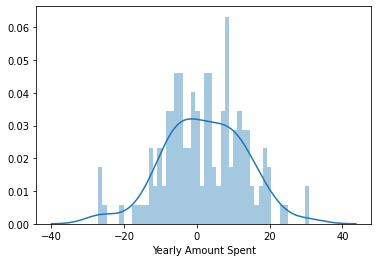

In [54]:
sns.distplot((y_test-yp),bins=50)

In [55]:
df=pd.DataFrame(data=lm.coef_,columns=['Coefficient'],index=x_train.columns)
df.head()

,Coefficient
Avg. Session Length,25.830334
Time on App,38.725176
Time on Website,0.951872
Length of Membership,61.643250
